<a href="https://colab.research.google.com/github/Manuelstv/mecanica-quantica/blob/main/diracdelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse trabalho foi produzido em google collaboratory exclusivamente por mim. Nenhuma parte deste trabalho (texto e fórmulas) foram copiadas digitalmente de outras fontes.

Manuel Veras

In [2]:
%matplotlib inline
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.misc import derivative
import seaborn as sns

# Parte 1:


In [3]:
#Integrando
def f(x,h,alfa):
  return np.exp(complex(-alfa*x*x,h*x))

In [4]:
#produto interno das funções
def int_f(h,alfa):
  #vamos analisar o integrando apenas com x no intervalo de [-5,5]
  x = np.arange(-5,5,0.1) 
  integral,erro = integrate.quad(lambda x: f2(x, h, alfa).real, -np.inf, np.inf)
  return integral

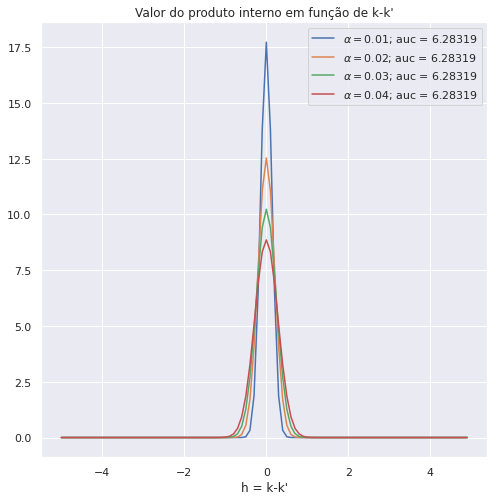

In [10]:
sns.set()
plt.rcParams["figure.figsize"] = (8,8)
f2 = np.vectorize(f)
int_f2 = np.vectorize(int_f) 

#conjunto dos alfas(onde o regularizador é exp(-alfa*x**2))
alfa_set = np.arange(0.01,0.05,0.01)
#conjunto dos valores de h, onde estamos usando h = k -k'
h_set = np.arange(-5,5,0.1)
#Vamos computar uma integral para cada valor de alfa
for alfa in alfa_set:
  curves=[]
  for h in h_set:
    curves.append(int_f2(h,alfa))
  #integral sobre h; deve convergir para 2*pi, quando alfa tende a 0
  area = integrate.cumtrapz(curves,h_set,initial = 0)
  plt.plot(h_set,curves,label = r"$\alpha = $" + str(round(alfa,2))+ "; auc = "+str(round(area[-1],5)))

plt.xlabel("h = k-k'")
plt.title("Valor do produto interno em função de k-k'")
plt.legend()
plt.show()